**ЗАДАНИЕ.**
<br>
Выполнить предварительную обработку данных в файле <b>DataSet2.csv</b>, затем реализуйте основные техники EDA (представленные в данном примере проекта по EDA), сопровождая полученные данные соответствующими выводами.

## Инициализация проекта

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from datetime import datetime, date, time

In [5]:
data=pd.read_csv(f'C:/Users/User/ml-labs/data/DataSet2.csv')

## Смотрю что из себя представляет датасет

In [6]:
data.head(10)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98
5,5,Hollywood Revue,1928/29,Metro-Goldwyn-Mayer,Nominee,1929,130,"Comedy,Music",5.7,"2,004",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689f22d5-a700-4ce1-b9be-65652f32c186
6,6,In Old Arizona,1928/29,Fox,Nominee,1928,95,Western,5.6,"1,019",...,Rotten,56.0,9.0,Spilled,38.0,356.0,2.0,5.0,4.0,a0644f19-a136-44c2-ab5d-50978ef19608
7,7,The Patriot,1928/29,Paramount Famous Lasky,Nominee,1928,113,"Drama,History,Thriller",7.4,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5d4ef7bd-2f81-47f3-9305-2c8fe140d4e4
8,8,All Quiet on the Western Front,1929/30,Universal,Winner,1930,152,"Drama,War",8.1,"59,214",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281742f9-3b4e-480d-b704-c8c15de6b721
9,9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,"2,079",...,Fresh,75.0,8.0,Upright,69.0,323.0,0.0,6.0,2.0,297aa285-29d7-4a22-b833-c5632ab3e562


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        438 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic C

Oscar Year преобразовать в тип дата взяв только первый год, считая, например 1928 как 1928-1929
Original Release Date, Streaming Release Date нужно перевести в тип дата
IMDB Votes нужно перевести в float


In [8]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Critic Consensus                    40.630473
Audience Status                     23.642732
Authors                             23.467601
Directors                           23.467601
Movie Info                          23.292469
Streaming Release Date              23.292469
Audience Rating                     23.117338
Audience Count                      23.117338
Tomatometer Count                   23.117338
Production Company                  23.117338
Tomatometer Top Critics Count       23.117338
Genres                              23.117338
Tomatometer Fresh Critics Count     23.117338
Content Rating                      23.117338
Tomatometer Rotten Critics Count    23.117338
Tomatometer Status                  23.117338
Actors                              23.117338
Original Release Date               23.117338
Tomatometer Rating                  23.117338
Unnamed: 0                           0.000000
Film                                 0.000000
IMDB Votes                        

Пропусков много, надо будет заполнять

## Пропущенные значения

Уберу дубликаты

In [9]:
data.duplicated().sum()

0

Заполню пропущенные значения в столбцах в которых невозможно предположить пропуск "unknown"

In [10]:
unknown_column=['Movie Info','Genres','Critic Consensus','Actors']
for column in unknown_column:
    data[column]=data[column].fillna('unknown')
data.isna().sum()

Unnamed: 0                            0
Film                                  0
Oscar Year                            0
Film Studio/Producer(s)               0
Award                                 0
Year of Release                       0
Movie Time                            0
Movie Genre                           0
IMDB Rating                           0
IMDB Votes                            0
Movie Info                            0
Genres                                0
Critic Consensus                      0
Content Rating                      132
Directors                           134
Authors                             134
Actors                                0
Original Release Date               132
Streaming Release Date              133
Production Company                  132
Tomatometer Status                  132
Tomatometer Rating                  132
Tomatometer Count                   132
Audience Status                     135
Audience Rating                     132


Переведу столбцы Original Release Date, Streaming Release Date в тип дата

In [11]:
data ['Original Release Date'] = pd.to_datetime(data['Original Release Date'],format = '%Y-%m-%d')
data['Original Release Date']

0     1927-08-12
1            NaT
2            NaT
3     1929-02-01
4            NaT
         ...    
566          NaT
567          NaT
568          NaT
569          NaT
570          NaT
Name: Original Release Date, Length: 571, dtype: datetime64[ns]

In [12]:
data ['Streaming Release Date'] = pd.to_datetime(data['Streaming Release Date'],format = '%Y-%m-%d')


Столбец Oscar Year заполню началом первого года, так под 1928-1-1 бдет пониматься 1928\29

In [13]:
f = lambda x : str(x)+"-01-01"
data['Oscar Year'] = data['Year of Release'].transform(f)
data['Oscar Year'] = pd.to_datetime(data['Oscar Year'],format = '%Y-%m-%d')
data['Oscar Year']

0     1927-01-01
1     1927-01-01
2     1928-01-01
3     1929-01-01
4     1929-01-01
         ...    
566   2020-01-01
567   2020-01-01
568   2020-01-01
569   2019-01-01
570   2020-01-01
Name: Oscar Year, Length: 571, dtype: datetime64[ns]

Original Release Date заполню началом года из столбца Year of Release
Streaming Release Date заполню либо годом релиза, либо, если фильм старше первого появившегося стриминга фильмов- датой появления стриминга

In [14]:
f = lambda x : str(x)+"-01-01"
data['Original Release Date'] = data['Original Release Date'].fillna(data['Year of Release'].transform(f))
g = lambda x: x if (x > pd.Timestamp(date(2007, 6, 1))) else date(2007, 6, 1)
data['Streaming Release Date'] = data['Streaming Release Date'].fillna(data['Original Release Date'].transform(g))
data.isna().sum()

Unnamed: 0                            0
Film                                  0
Oscar Year                            0
Film Studio/Producer(s)               0
Award                                 0
Year of Release                       0
Movie Time                            0
Movie Genre                           0
IMDB Rating                           0
IMDB Votes                            0
Movie Info                            0
Genres                                0
Critic Consensus                      0
Content Rating                      132
Directors                           134
Authors                             134
Actors                                0
Original Release Date                 0
Streaming Release Date                0
Production Company                  132
Tomatometer Status                  132
Tomatometer Rating                  132
Tomatometer Count                   132
Audience Status                     135
Audience Rating                     132


Заполню некатегориальные признаки по моде других признаков :

In [15]:
rating = lambda x: x.mode().iat[0] if x.notna().any() else 'NR'
content_rating = data.groupby('Directors')['Content Rating'].transform(rating)
data['Content Rating'] = data['Content Rating'].fillna(content_rating)


f = lambda x: x.mode().iat[0] if x.notna().any() else 'unknown' 
fill_director = data.groupby('Film Studio/Producer(s)')['Directors'].transform(f)
data['Directors'] = data['Directors'].fillna(fill_director)
fill_author = data.groupby('Film Studio/Producer(s)')['Authors'].transform(f)
data['Authors'] = data['Authors'].fillna(fill_author)
fill_company = data.groupby('Directors')['Production Company'].transform(f)
data['Production Company'] = data['Production Company'].fillna(fill_company)
fill_status = data.groupby('Directors')['Tomatometer Status'].transform(f)
data['Tomatometer Status'] = data['Tomatometer Status'].fillna(fill_status)
fill_aud = data.groupby('Directors')['Audience Status'].transform(f)
data['Audience Status'] = data['Audience Status'].fillna(fill_aud)
data.isna().sum()

Unnamed: 0                            0
Film                                  0
Oscar Year                            0
Film Studio/Producer(s)               0
Award                                 0
Year of Release                       0
Movie Time                            0
Movie Genre                           0
IMDB Rating                           0
IMDB Votes                            0
Movie Info                            0
Genres                                0
Critic Consensus                      0
Content Rating                      132
Directors                             0
Authors                               0
Actors                                0
Original Release Date                 0
Streaming Release Date                0
Production Company                    0
Tomatometer Status                    0
Tomatometer Rating                  132
Tomatometer Count                   132
Audience Status                       0
Audience Rating                     132


In [16]:
f = lambda x: int(str(x).replace(',',''))

data['IMDB Votes'] = data['IMDB Votes'].transform(f)

Пропуски вAudience Count и Tomatometer Rating заполню выбросами

In [17]:
data['Audience Count'] = data['Audience Count'].fillna(-1)
data['Tomatometer Rating'] = data['Tomatometer Rating'].fillna(-1)

In [18]:
data.isna().sum()

Unnamed: 0                            0
Film                                  0
Oscar Year                            0
Film Studio/Producer(s)               0
Award                                 0
Year of Release                       0
Movie Time                            0
Movie Genre                           0
IMDB Rating                           0
IMDB Votes                            0
Movie Info                            0
Genres                                0
Critic Consensus                      0
Content Rating                      132
Directors                             0
Authors                               0
Actors                                0
Original Release Date                 0
Streaming Release Date                0
Production Company                    0
Tomatometer Status                    0
Tomatometer Rating                    0
Tomatometer Count                   132
Audience Status                       0
Audience Rating                     132


Посмотрим на корреляцию значений

In [19]:
data[['IMDB Rating','Tomatometer Count','Tomatometer Rating','Audience Rating','Audience Count','Movie Time','Year of Release','Tomatometer Rotten Critics Count', 'Tomatometer Fresh Critics Count', 'Tomatometer Top Critics Count']].corr()

,IMDB Rating,Tomatometer Count,Tomatometer Rating,Audience Rating,Audience Count,Movie Time,Year of Release,Tomatometer Rotten Critics Count,Tomatometer Fresh Critics Count,Tomatometer Top Critics Count
IMDB Rating,1.000000,0.268721,0.300352,0.859044,0.150687,0.292357,0.329910,0.101679,0.279789,0.294503
Tomatometer Count,0.268721,1.000000,0.111996,0.157585,0.067923,0.091782,0.805810,0.662408,0.990934,0.943635
Tomatometer Rating,0.300352,0.111996,1.000000,0.506349,0.063904,0.080586,0.159165,-0.337102,0.184758,0.114217
Audience Rating,0.859044,0.157585,0.506349,1.000000,-0.014034,0.145336,0.238831,-0.002000,0.175147,0.192354
Audience Count,0.150687,0.067923,0.063904,-0.014034,1.000000,0.171932,0.089266,0.065931,0.063454,0.121112
Movie Time,0.292357,0.091782,0.080586,0.145336,0.171932,1.000000,0.242018,0.166130,0.071951,0.114933
Year of Release,0.329910,0.805810,0.159165,0.238831,0.089266,0.242018,1.000000,0.567570,0.792311,0.847781
Tomatometer Rotten Critics Count,0.101679,0.662408,-0.337102,-0.002000,0.065931,0.166130,0.567570,1.000000,0.555764,0.608254
Tomatometer Fresh Critics Count,0.279789,0.990934,0.184758,0.175147,0.063454,0.071951,0.792311,0.555764,1.000000,0.937991
Tomatometer Top Critics Count,0.294503,0.943635,0.114217,0.192354,0.121112,0.114933,0.847781,0.608254,0.937991,1.000000


Есть сильная корреляция между Tomatometer Count и Year of Release, а также между Tomatometer Count и Tomatometer Rotten Critics Count, Tomatometer Fresh Critics Count,	Tomatometer Top Critics Count

Заполню Tomatometer Count

In [20]:
data.describe()[['Year of Release','Tomatometer Count']]

,Year of Release,Tomatometer Count
count,571.000000,439.000000
mean,1973.357268,110.697039
min,1927.000000,5.000000
25%,1944.000000,25.000000
50%,1972.000000,54.000000
75%,2001.000000,199.000000
max,2021.000000,574.000000
std,29.315738,119.541406


In [21]:
tomatometr_count = lambda x: round(x*(110.7/1973))
data['Tomatometer Count'] = data['Tomatometer Count'].fillna(data['Year of Release'].transform(tomatometr_count))

Теперь могу заполнить Tomatometer Rotten Critics Count, Tomatometer Fresh Critics Count,	Tomatometer Top Critics Count

In [22]:
data.describe()[['Tomatometer Count','Tomatometer Rotten Critics Count','Tomatometer Top Critics Count','Tomatometer Fresh Critics Count']]

,Tomatometer Count,Tomatometer Rotten Critics Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count
count,571.000000,439.000000,439.000000,439.000000
mean,110.588441,12.275626,21.861048,98.471526
min,5.000000,0.000000,0.000000,3.000000
25%,33.000000,2.000000,5.000000,21.500000
50%,82.000000,5.000000,11.000000,49.000000
75%,113.000000,15.000000,45.000000,163.500000
max,574.000000,182.000000,69.000000,495.000000
std,104.793232,19.310232,21.615492,107.798554


In [23]:
tomatometr_rotten = lambda x: round(x*(12.3/110.5))
data['Tomatometer Rotten Critics Count'] = data['Tomatometer Rotten Critics Count'].fillna(data['Tomatometer Count'].transform(tomatometr_rotten))

tomatometr_top = lambda x: round(x*(21.9/110.6))
data['Tomatometer Top Critics Count'] = data['Tomatometer Top Critics Count'].fillna(data['Tomatometer Count'].transform(tomatometr_top))

tomatometr_fresh = lambda x: round(x*(98.5/110.6))
data['Tomatometer Fresh Critics Count'] = data['Tomatometer Fresh Critics Count'].fillna(data['Tomatometer Count'].transform(tomatometr_fresh))

Сильная корреляция между IMDB Rating и Tomatometer Rating, заполню Tomatometer Rating

In [24]:
data.describe()[['IMDB Rating','Audience Rating']]

,IMDB Rating,Audience Rating
count,571.000000,439.000000
mean,7.570403,82.428246
min,5.600000,21.000000
25%,7.300000,78.000000
50%,7.600000,85.000000
75%,7.900000,90.000000
max,9.300000,98.000000
std,0.559652,10.927897


In [25]:
tomatometr_rating = lambda x: round(x*(82.4/7.6))
data['Audience Rating'] = data['Audience Rating'].fillna(data['IMDB Rating'].transform(tomatometr_rating))

In [26]:
data.isna().sum()

Unnamed: 0                            0
Film                                  0
Oscar Year                            0
Film Studio/Producer(s)               0
Award                                 0
Year of Release                       0
Movie Time                            0
Movie Genre                           0
IMDB Rating                           0
IMDB Votes                            0
Movie Info                            0
Genres                                0
Critic Consensus                      0
Content Rating                      132
Directors                             0
Authors                               0
Actors                                0
Original Release Date                 0
Streaming Release Date                0
Production Company                    0
Tomatometer Status                    0
Tomatometer Rating                    0
Tomatometer Count                     0
Audience Status                       0
Audience Rating                       0


## Коррекция данных

теперь когда данные без пропусков, можно поменять типы данных

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        571 non-null    int64         
 1   Film                              571 non-null    object        
 2   Oscar Year                        571 non-null    datetime64[ns]
 3   Film Studio/Producer(s)           571 non-null    object        
 4   Award                             571 non-null    object        
 5   Year of Release                   571 non-null    int64         
 6   Movie Time                        571 non-null    int64         
 7   Movie Genre                       571 non-null    object        
 8   IMDB Rating                       571 non-null    float64       
 9   IMDB Votes                        571 non-null    int64         
 10  Movie Info                        571 non-null    

In [28]:
data['Movie Time'] = data['Movie Time'] .astype(int)
data['IMDB Votes'] = data['IMDB Votes'].astype(float)
data['Tomatometer Rating'] = data['Tomatometer Rating'].astype(int)
data['Tomatometer Count'] = data['Tomatometer Count'].astype(int)
data['Audience Rating'] = data['Audience Rating'].astype(int)
data['Audience Count'] = data['Audience Rating'].astype(int)
data['Tomatometer Top Critics Count'] = data['Tomatometer Top Critics Count'].astype(int)
data['Tomatometer Fresh Critics Count'] = data['Tomatometer Fresh Critics Count'].astype(int)
data['Tomatometer Rotten Critics Count'] = data['Tomatometer Rotten Critics Count'].astype(int)

## EDA

рассмотрим некоторые столбцы в виде гистограмм

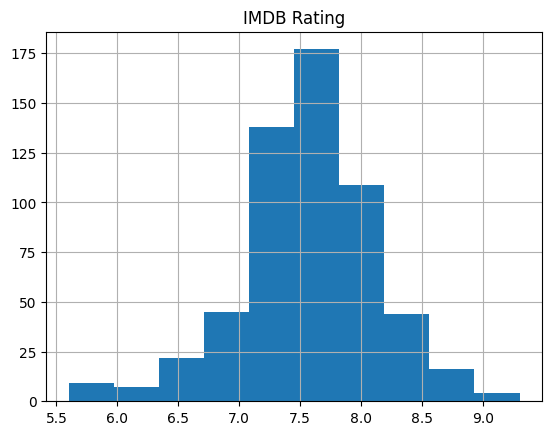

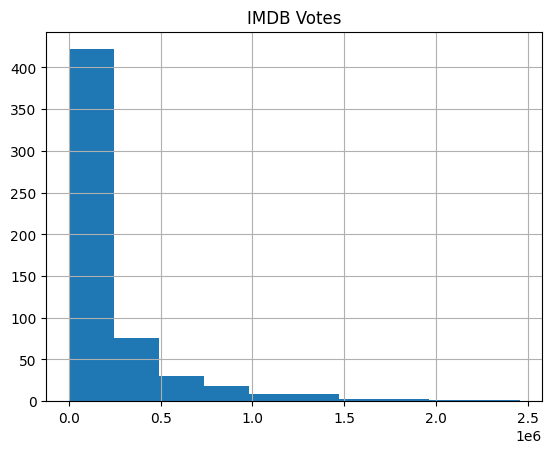

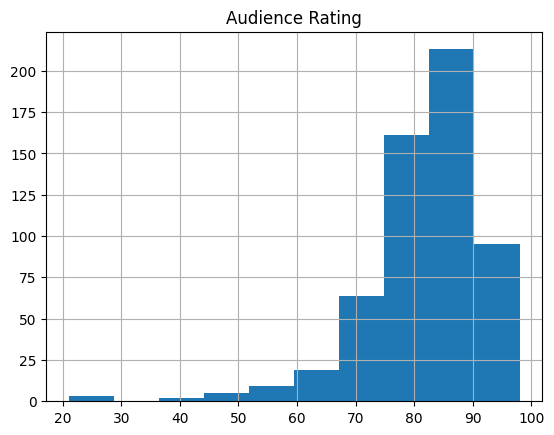

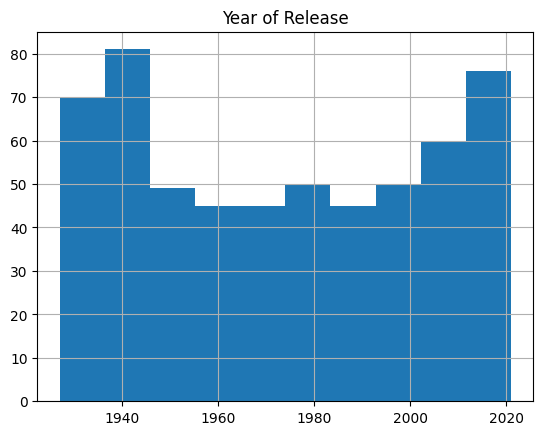

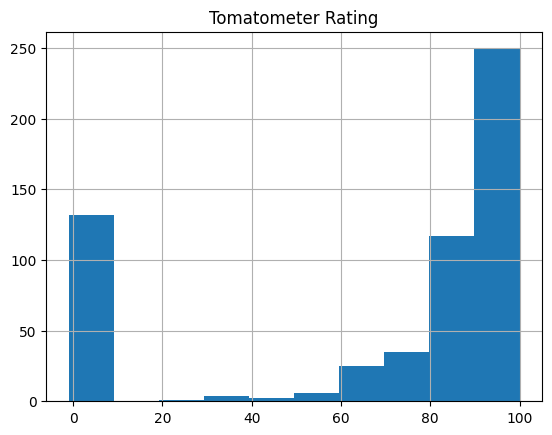

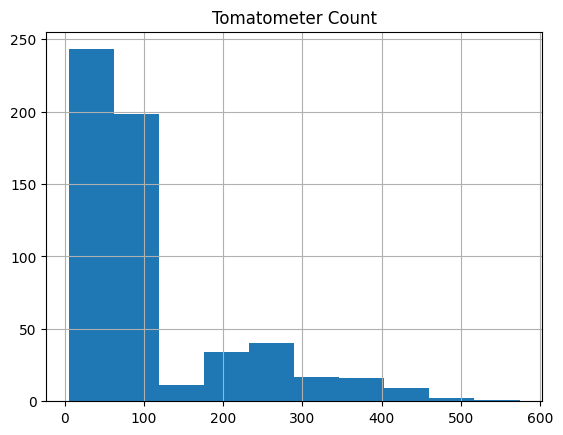

In [29]:
columns = ["IMDB Rating","IMDB Votes", "Audience Rating", "Year of Release", "Tomatometer Rating","Tomatometer Count"]
for column in columns:
    data.hist(column)

По данным видно что в столбцах Tomatometr Rating, Tomatomtr Count и IMDB Votes, а график Audince Rating смешен в право

Обработаем выбросы

In [30]:
outlier = data[["Tomatometer Count", "Tomatometer Rating", "IMDB Votes"]]
outlier

,Tomatometer Count,Tomatometer Rating,IMDB Votes
0,46,93,12221.0
1,108,-1,3439.0
2,108,-1,1257.0
3,24,33,6890.0
4,108,-1,765.0
...,...,...,...
566,113,-1,65380.0
567,113,-1,57976.0
568,113,-1,122269.0
569,113,-1,102807.0


Вычислим межквартильный размах и создадим новый датафрейм без выбросов

In [31]:
Q1 = outlier.quantile(0.25)
Q1

Tomatometer Count       33.0
Tomatometer Rating      57.5
IMDB Votes            9660.5
Name: 0.25, dtype: float64

In [32]:
Q3 = outlier.quantile(0.75)
Q3

Tomatometer Count        113.0
Tomatometer Rating        94.0
IMDB Votes            259429.0
Name: 0.75, dtype: float64

In [33]:
IQR = Q3 - Q1


data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) | (outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,Tomatometer Count,Tomatometer Rating,IMDB Votes
0,46,93,12221.0
3,24,33,6890.0
6,9,56,1019.0
9,8,75,2079.0
13,24,50,5851.0
...,...,...,...
489,227,93,312181.0
490,224,93,401524.0
495,223,93,96258.0
496,204,87,82051.0


In [34]:
# Хранить данные без выбросов в отдельном DataFrame.
index_list = list(data_filtered.index.values)
data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927-01-01,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221.0,...,Certified-Fresh,93,46,Upright,78,78,9,43,3,2becf7d5-a3de-46ab-ae45-abdd6b588067
3,3,The Broadway Melody,1929-01-01,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,6890.0,...,Rotten,33,24,Spilled,21,21,7,8,16,de063f3f-2d35-4e1c-8636-6eb4c16bd236
6,6,In Old Arizona,1928-01-01,Fox,Nominee,1928,95,Western,5.6,1019.0,...,Rotten,56,9,Spilled,38,38,2,5,4,a0644f19-a136-44c2-ab5d-50978ef19608
9,9,The Big House,1930-01-01,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,2079.0,...,Fresh,75,8,Upright,69,69,0,6,2,297aa285-29d7-4a22-b833-c5632ab3e562
13,13,Cimarron,1931-01-01,RKO Radio,Winner,1931,123,"Drama,Western",5.9,5851.0,...,Rotten,50,24,Spilled,25,25,6,12,12,db2683c0-128e-4b5c-858f-d9f18c2fb9b9


Рассмотрим гистограммы быз выбросов

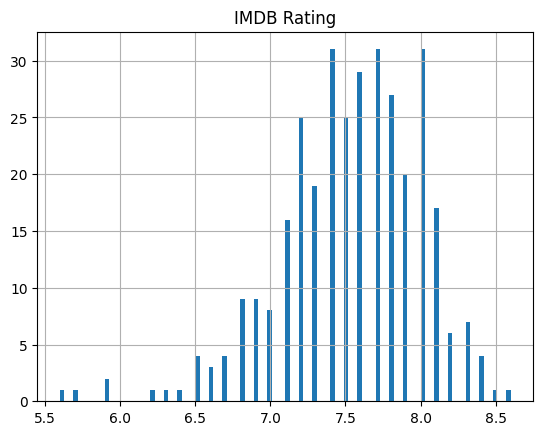

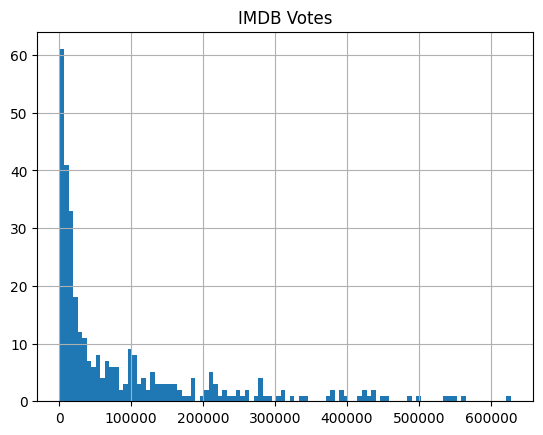

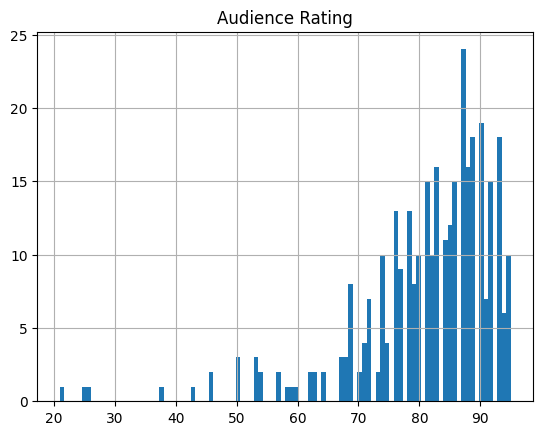

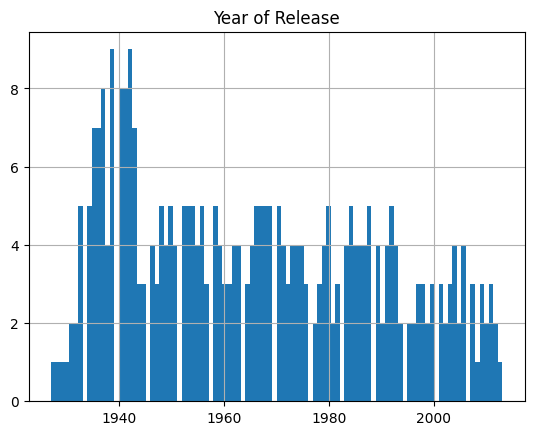

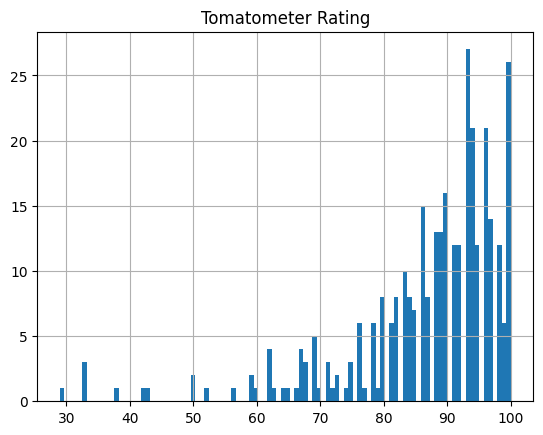

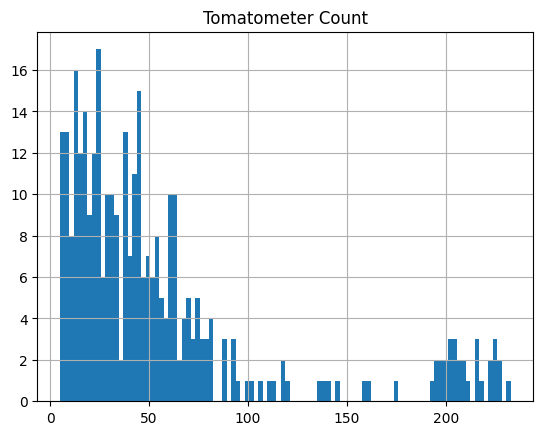

In [35]:
# создать гистограмму с отфильтрованным выбросом
for col in columns:
    data_filtered.hist(col, bins=100)

Выбросы обработаны, вернемся к EDA

Хочу расссмотреть зависимость между рейтингом фильма и его оценками, рассмотрим графики scatter plot для фильмов с максимально достпным рейтингом и максимально недостпным, и средний еще, где X и Y - рейтинги IMDB и Audience

In [36]:
data.groupby("Content Rating")["Content Rating"].count()

Content Rating
G         48
NR       107
PG        78
PG-13     68
R        138
Name: Content Rating, dtype: int64

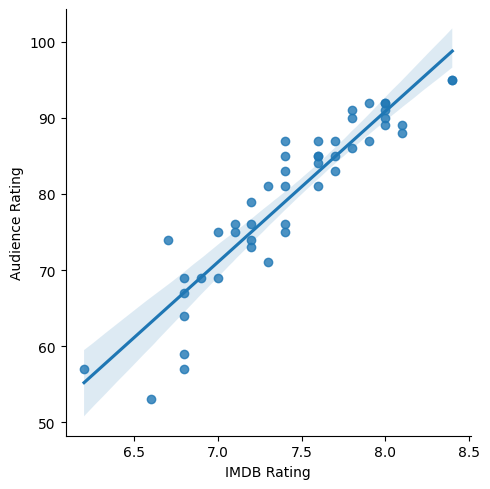

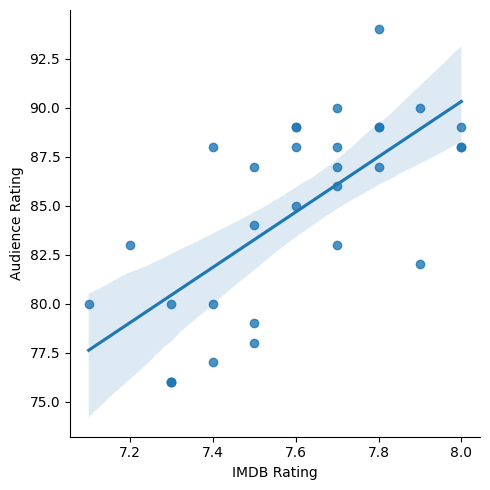

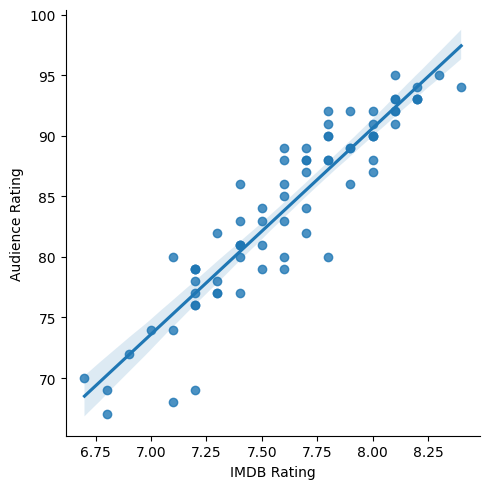

In [37]:
sns.lmplot(data_filtered[data_filtered["Content Rating"] == "G"], x="IMDB Rating", y="Audience Rating")
sns.lmplot(data_filtered[data_filtered["Content Rating"] == "PG-13"], x="IMDB Rating", y="Audience Rating")
sns.lmplot(data_filtered[data_filtered["Content Rating"] == "R"], x="IMDB Rating", y="Audience Rating")

Вцелом понятно что оценки IMDB и Audience сильно связаны, но можно сказать что самый малый разброс оценок у уже взрослых людей, а самый большой разброс у подростков

<Axes: title={'center': 'Audience Rating'}, xlabel='Content Rating'>

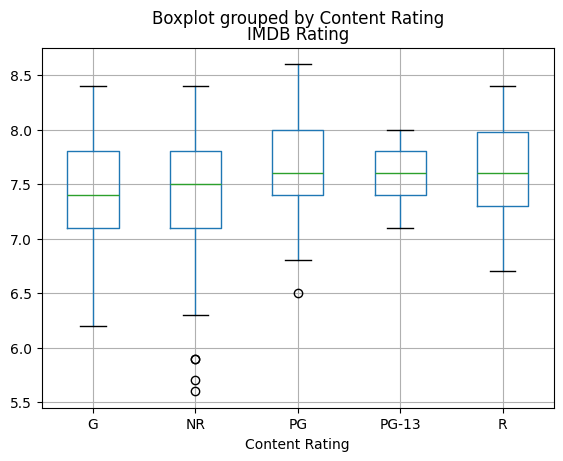

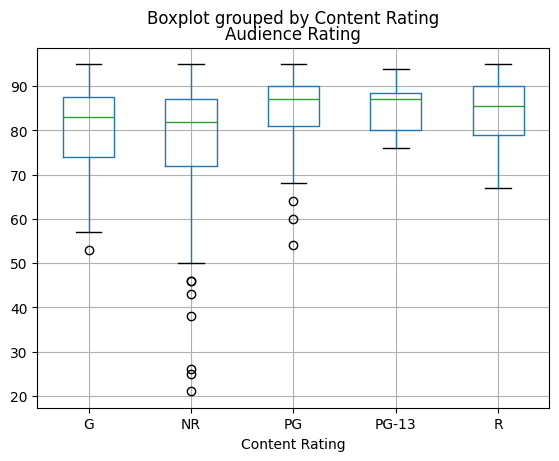

In [38]:
data_filtered.boxplot(by="Content Rating", column="IMDB Rating", grid=True)
data_filtered.boxplot(by="Content Rating", column="Audience Rating", grid=True)

Во первых видно что аудитория вцелом принимает фильмы лучше и ставит более высокие оценки чем IMDB
Во вторых видно что для категорий PG и R(17+) оценки вцелом выше чем у остальных категорий и между собой почти равны, но у R количество более низких оценок больше чем  PG, 
